<a href="https://www.kaggle.com/code/cirillafiona/hw1-indian-pine?scriptVersionId=122978251" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
from scipy.io import loadmat
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-pines/Indian_pines_corrected.mat
/kaggle/input/indian-pines/Indian_pines_gt.mat


In [2]:
# # Kaggle运行使用
def LoadData():
    data_path = '../input/'
    data = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_corrected.mat'))['indian_pines_corrected']
    labels = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_gt.mat'))['indian_pines_gt']  
    return data, labels

In [3]:
# # 本地运行使用
# def LoadData():
#     data_path = './data/'
#     data = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_corrected.mat'))['indian_pines_corrected']
#     labels = loadmat(os.path.join(data_path, 'indian-pines/Indian_pines_gt.mat'))['indian_pines_gt']

In [4]:
# if __name__ == '__main__':
#     # 读取数据
#     data, label = LoadData()
#     data = data.reshape(-1, 200)
#     label = label.reshape(-1, )
#     # 使用stratify参数可以平衡划分数据集，提高一点精度，这里可以对比运行一下
#     data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.3, random_state=42, stratify=label)
#     rfc = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=42, n_jobs=-1)
#     rfc = rfc.fit(data_train, label_train)
#     score_train = rfc.score(data_train, label_train)
#     score_test = rfc.score(data_test, label_test)
#     label_pred = rfc.predict(data_test)
#     print("随机森林：" + "训练集：" + str(score_train) + " 测试集：" + str(score_test))
#     print(classification_report(label_test, label_pred))

In [5]:
if __name__ == '__main__':
    # 读取数据
    data, labels = LoadData()
    # 打印数据和标签的形状
    print(f"Data shape: {data.shape}")
    print(f"Labels shape: {labels.shape}")
    
    X = data.reshape(-1, 200)
    y = labels.reshape(-1, )

    # 将数据分成训练集和测试集，使用stratify参数可以平衡划分数据集，提高一点精度
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

    # 创建一个随机森林分类器
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # 在训练集上训练分类器
    rf.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred = rf.predict(X_test)

    # 打印分类报告和混淆矩阵
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Data shape: (145, 145, 200)
Labels shape: (145, 145)
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3233
           1       1.00      0.64      0.78        14
           2       0.79      0.77      0.78       428
           3       0.80      0.64      0.71       249
           4       0.71      0.55      0.62        71
           5       0.91      0.66      0.77       145
           6       0.90      0.69      0.78       219
           7       0.83      0.62      0.71         8
           8       0.90      0.92      0.91       143
           9       0.00      0.00      0.00         6
          10       0.80      0.78      0.79       292
          11       0.77      0.85      0.81       737
          12       0.79      0.65      0.71       178
          13       0.93      0.87      0.90        61
          14       0.70      0.52      0.59       380
          15       0.00      0.00      0.00       116
          16       0.88     

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


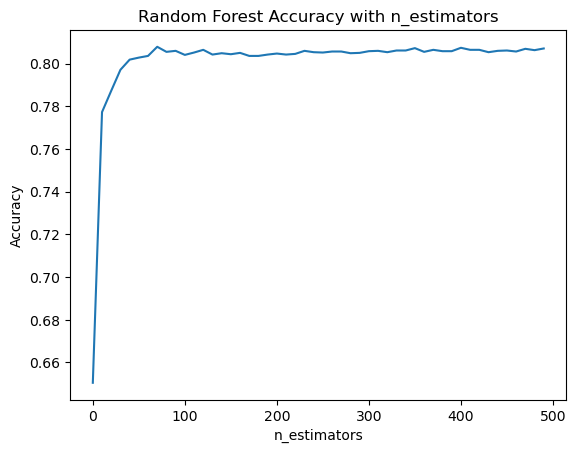

In [6]:
    # 绘制随着n_estimators变化准确率的变化图(很慢)
    accuracies = []
    for n in range(0, 500, 10):
        clf = RandomForestClassifier(n_estimators=n+1, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    plt.plot(range(0, 500, 10), accuracies)
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.title('Random Forest Accuracy with n_estimators')
    plt.show()

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10776
           1       1.00      0.89      0.94        46
           2       0.94      0.93      0.93      1428
           3       0.95      0.89      0.92       830
           4       0.93      0.86      0.90       237
           5       0.98      0.90      0.94       483
           6       0.97      0.91      0.94       730
           7       0.96      0.89      0.93        28
           8       0.97      0.98      0.97       478
           9       1.00      0.70      0.82        20
          10       0.94      0.94      0.94       972
          11       0.93      0.96      0.94      2455
          12       0.94      0.90      0.92       593
          13       0.98      0.96      0.97       205
          14       0.93      0.85      0.89      1265
          15       1.00      0.70      0.82       386
          16       0.97      0.92      0.95        93

    accuracy              

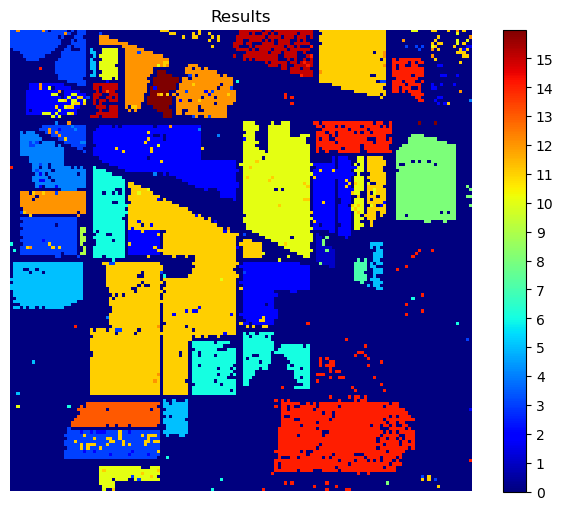

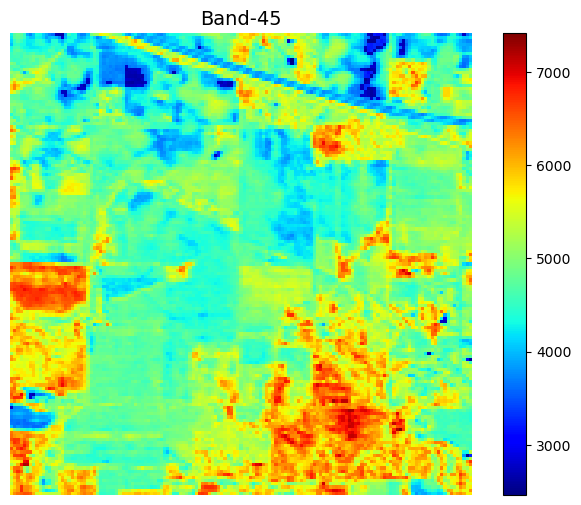

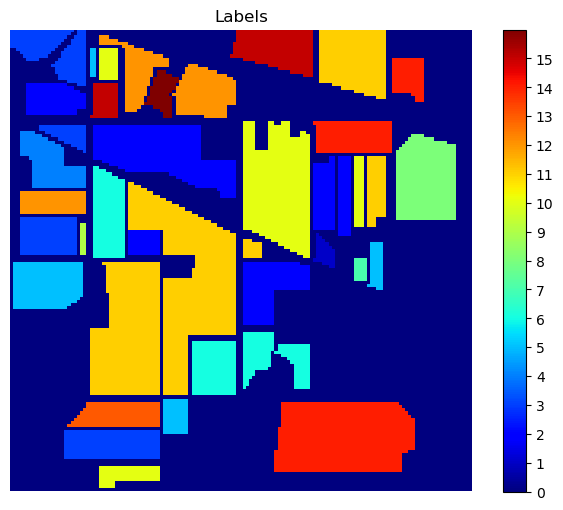

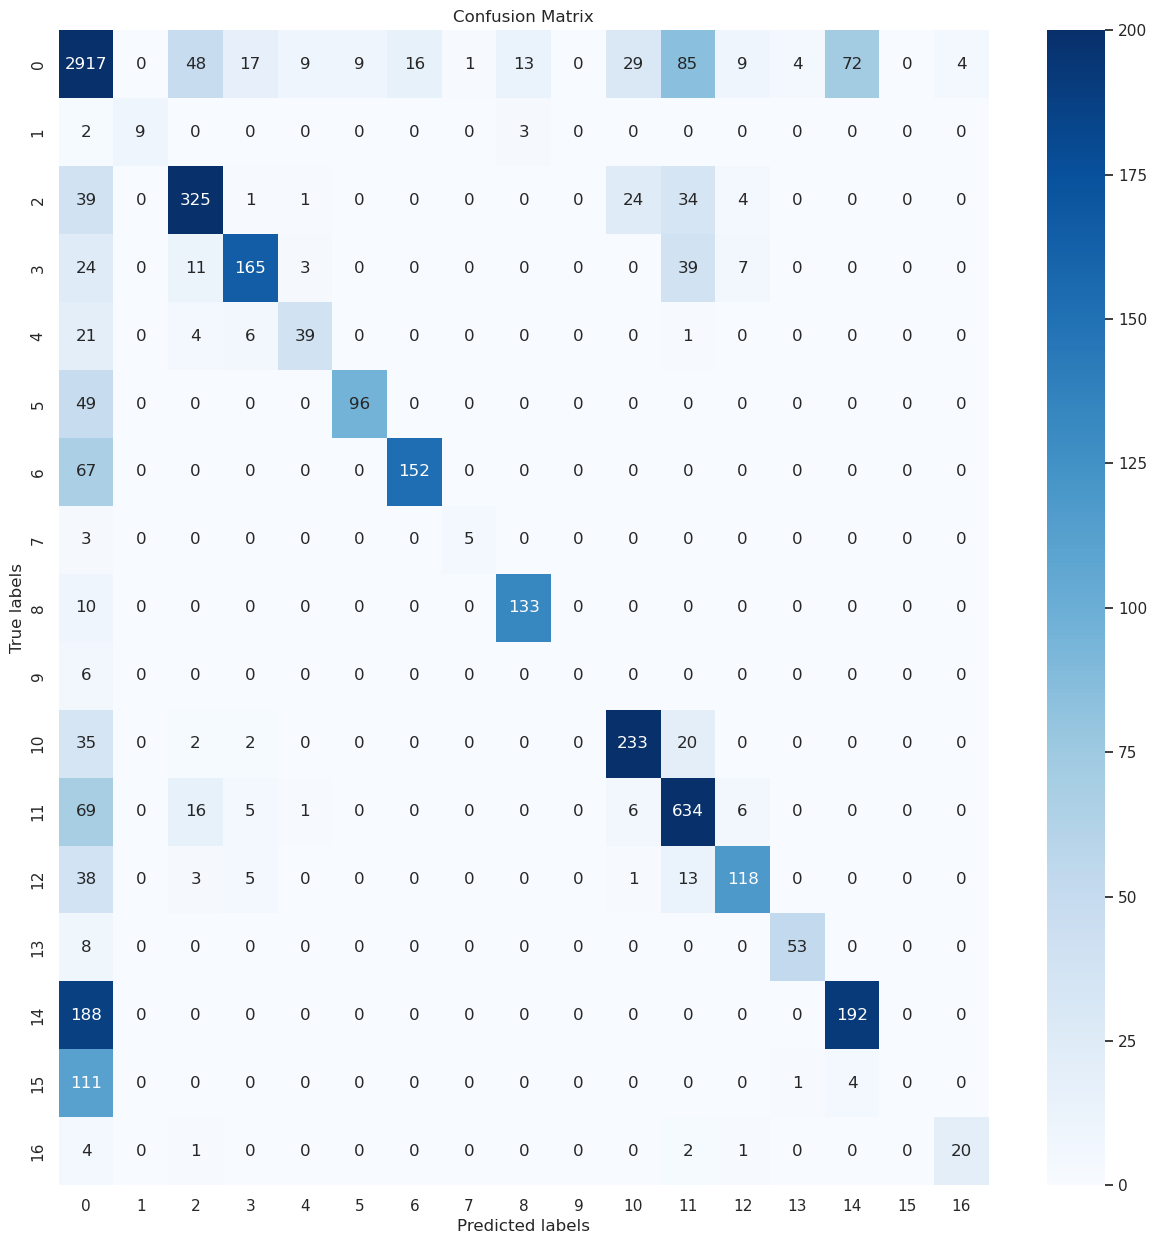

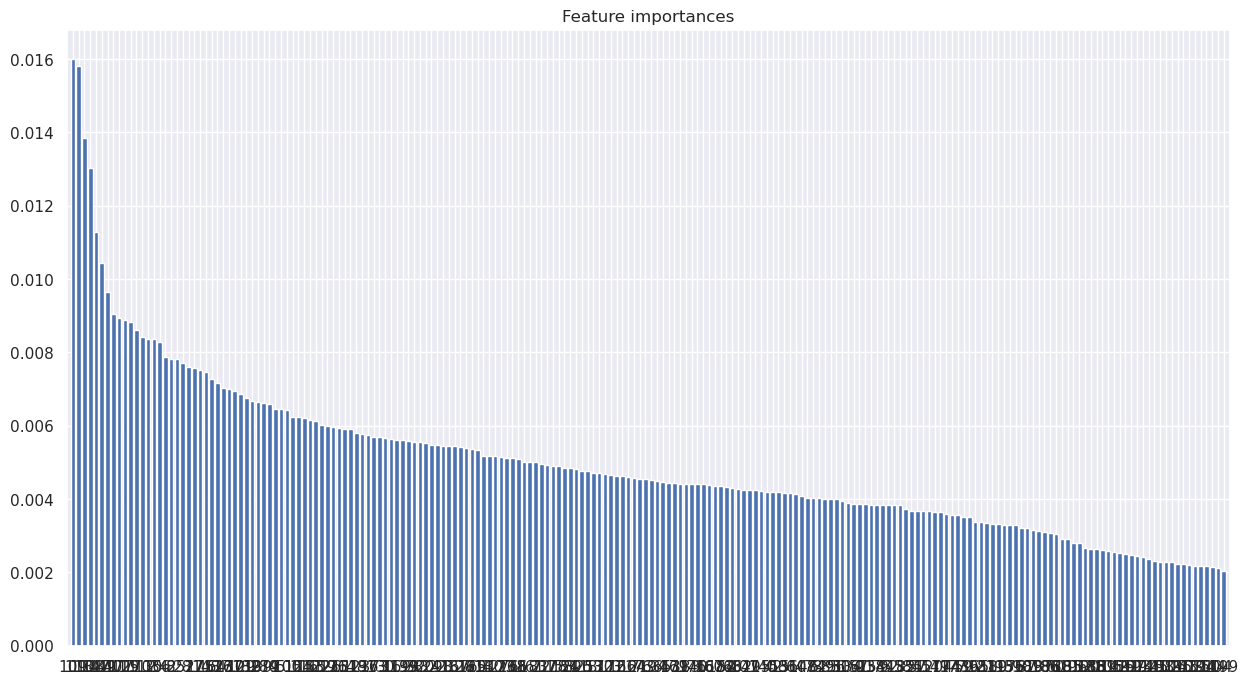

Top 10 important bands:
Band 109: 0.01599926828911866
Band 113: 0.01581215354073484
Band 114: 0.013849546385410116
Band 108: 0.013042034493327182
Band 147: 0.011290269964705033
Band 149: 0.010433049391263787
Band 140: 0.009652837806267826
Band 111: 0.009059560677131049
Band 177: 0.008942966630396735
Band 115: 0.00887588722916486


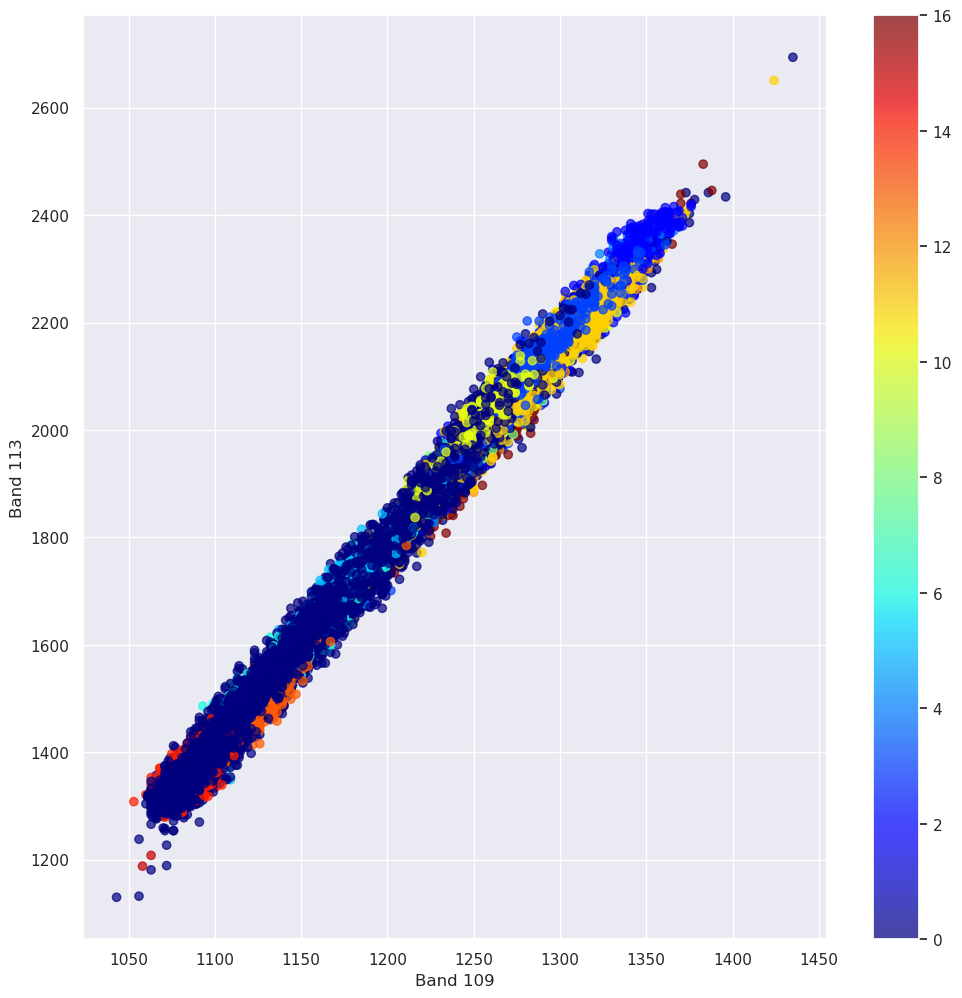

In [7]:
    # 绘制所有数据的预测结果
    Y_pred = rf.predict(X)
    print(classification_report(y, Y_pred))
    Y_pred2 = Y_pred.reshape(145, 145)
    plt.figure(figsize=(8, 6))
    plt.imshow(Y_pred2, cmap='jet')
    plt.axis('off')
    plt.colorbar(ticks= range(0,16))
    plt.title("Results")
    plt.show()
    
    # 绘制随机波段的特征
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(data.shape[2])
    plt.imshow(data[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    
    # 绘制标签
    plt.figure(figsize=(8, 6))
    plt.imshow(labels, cmap='jet')
    plt.axis('off')
    plt.colorbar(ticks= range(0,16))
    plt.title("Labels")
    plt.show()
    
    # 绘制混淆矩阵图
    plt.figure(figsize=(15, 15))
    sns.set(font_scale=1)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', vmin=0, vmax=200)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # 可视化每个波段的重要性
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(15, 8))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    # 显示前10个最重要的波段
    print("Top 10 important bands:")
    for i in range(10):
        print(f"Band {indices[i]}: {importances[indices[i]]}")

    # 可视化前两个波段的散点图
    plt.figure(figsize=(12, 12))
    plt.scatter(X[:, indices[0]], X[:, indices[1]], c=y, cmap='jet', alpha=0.7)
    plt.colorbar()
    plt.xlabel(f"Band {indices[0]}")
    plt.ylabel(f"Band {indices[1]}")
    plt.show()

In [8]:
# # 调参，很慢，效果并不好，可以写写
# if __name__ == '__main__':
#     # 读取数据
#     data, labels = LoadData()
#     # 数据预处理
#     data = data.reshape(-1, 200)
#     labels = labels.reshape(-1, )

#     X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)

#     # 使用HalvingGridSearchCV进行超参数优化
#     params = {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [5, 10, 15],
#         'min_samples_split': [2, 4, 6],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': ['sqrt', 'log2', None]
#     }
#     clf = RandomForestClassifier()
#     search = HalvingGridSearchCV(estimator=clf,
#                                  param_grid=params,
#                                  scoring='accuracy',
#                                  factor=2,
#                                  min_resources='exhaust',
#                                  max_resources=300,
#                                  verbose=3,
#                                  n_jobs=-1)
#     search.fit(X_train, y_train)

#     # 输出最佳参数和测试集准确率
#     best_params = search.best_params_
#     print('Best parameters:', best_params)
# #####最终优化结果，没有默认的参数优化好 ######
#     # Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
#     # Test accuracy: 0.7668040583386176
#     clf = RandomForestClassifier(**best_params)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print('Test accuracy:', acc)